In [ ]:
%pip install fastai

In [2]:
from fastai.vision.all import *
from contextlib import contextmanager
import pathlib

In [3]:
@contextmanager
def set_posix_windows():
    posix_backup = pathlib.PosixPath
    try:
        pathlib.PosixPath = pathlib.WindowsPath
        yield
    finally:
        pathlib.PosixPath = posix_backup

In [4]:
model_path = pathlib.Path('models/model.pkl')

with set_posix_windows():
    learn = load_learner(model_path)

Searching for 'coffee photos'


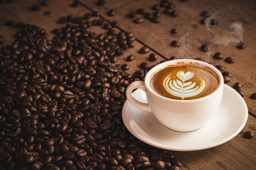

In [7]:
from duckduckgo_search import ddg_images
from fastdownload import download_url

def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

download_url(search_images('coffee photos', max_images=1)[0], 'coffee.jpg', show_progress=True)
Image.open('coffee.jpg').to_thumb(256,256)

In [ ]:
download_url(search_images('smoothie photos', max_images=1)[0], 'smoothie.jpg', show_progress=True)
Image.open('smoothie.jpg').to_thumb(256,256)

is_beer,_,probs = learn.predict('smoothie.jpg')
print(f"This is a: {is_beer}.")
print(f"Probability it's a beer: {probs[0]:.4f}")

In [ ]:
is_beer,_,probs = learn.predict('smoothie.jpg')
print(f"This is a: {is_beer}.")